In [ ]:
import numpy as np
import cv2
from numba import jit
import os
from matplotlib import pyplot as plt
import math
import csv
from sklearn import preprocessing
from google.colab.patches import cv2_imshow

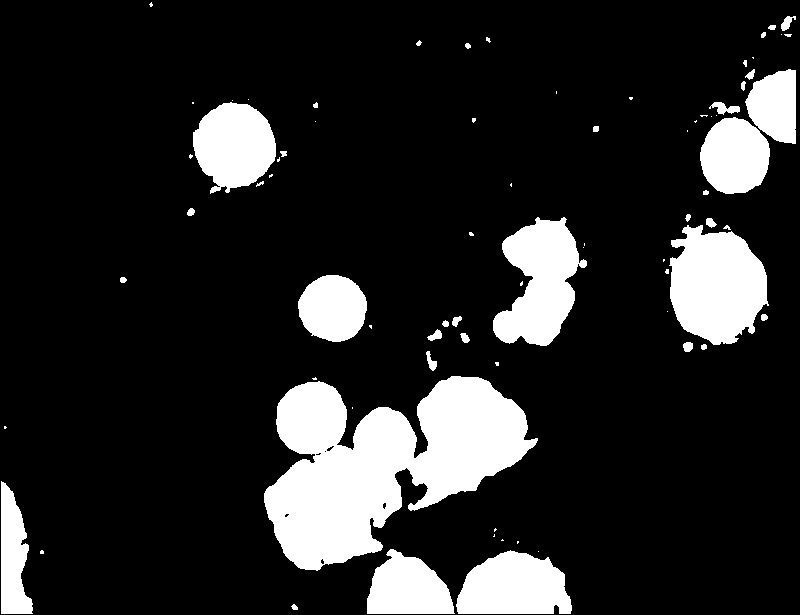

In [ ]:
img= cv2.imread('/content/2.jpg')#3315 pores present
img=cv2.resize(img,(800,615))
gray_img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
ret,thresh = cv2.threshold(gray_img,140,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
#kernel = np.ones((15,15), dtype = np.uint8) 
#thresh = cv2.dilate(thresh,kernel,3)
cv2_imshow(thresh)

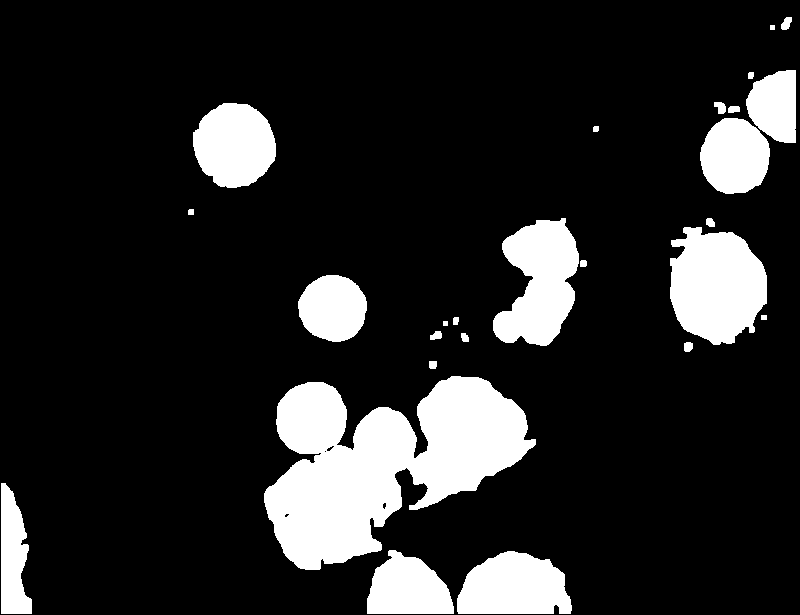

In [ ]:
kernel = np.ones((5,5))#5,5 for normal
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
cv2_imshow(opening)

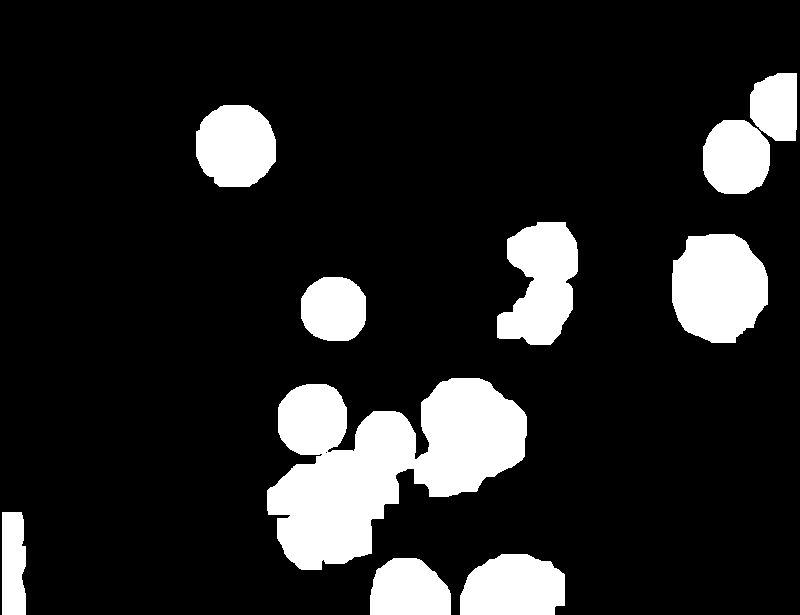

In [ ]:
kernel = np.ones((20,20))
opening = cv2.morphologyEx(opening, cv2.MORPH_OPEN, kernel)

cv2_imshow(opening)

In [ ]:
opening.shape, img.shape

((615, 800), (615, 800, 3))

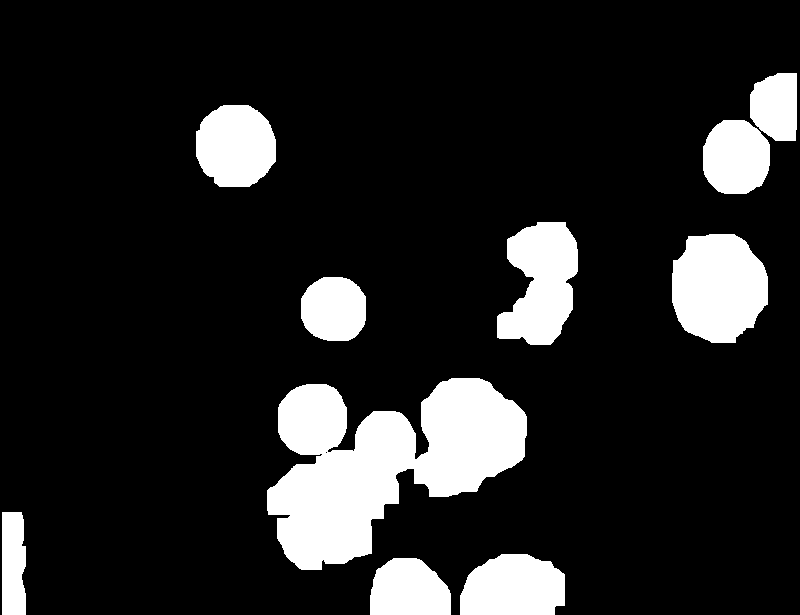

In [ ]:
final_img = cv2.cvtColor(opening,cv2.COLOR_GRAY2RGB)
cv2_imshow(final_img)

array([235, 241, 244], dtype=uint8)

In [ ]:
final_img[3][4] == [255,255,255]

array([False, False, False])

In [ ]:
final_img[612][799] == [0,0,0]

array([ True,  True,  True])

In [ ]:
a =615
b=800
for i in range(0,a):
  for j in range(0,b):
    if final_img[i][j][0] == 255 and final_img[i][j][1] == 255 and final_img[i][j][2] == 255:
      final_img[i][j][0]=img[i][j][0] 
      final_img[i][j][1]=img[i][j][1]
      final_img[i][j][2]=img[i][j][2]  

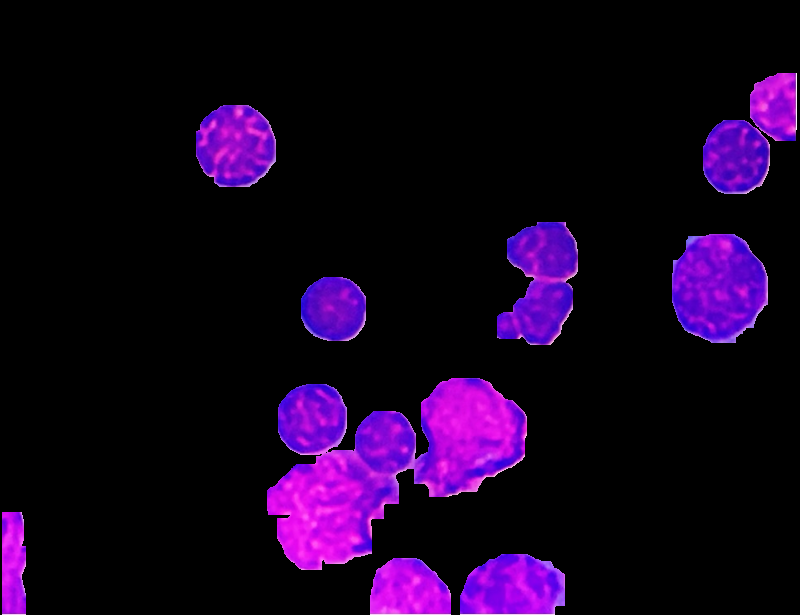

In [ ]:
cv2_imshow(final_img)

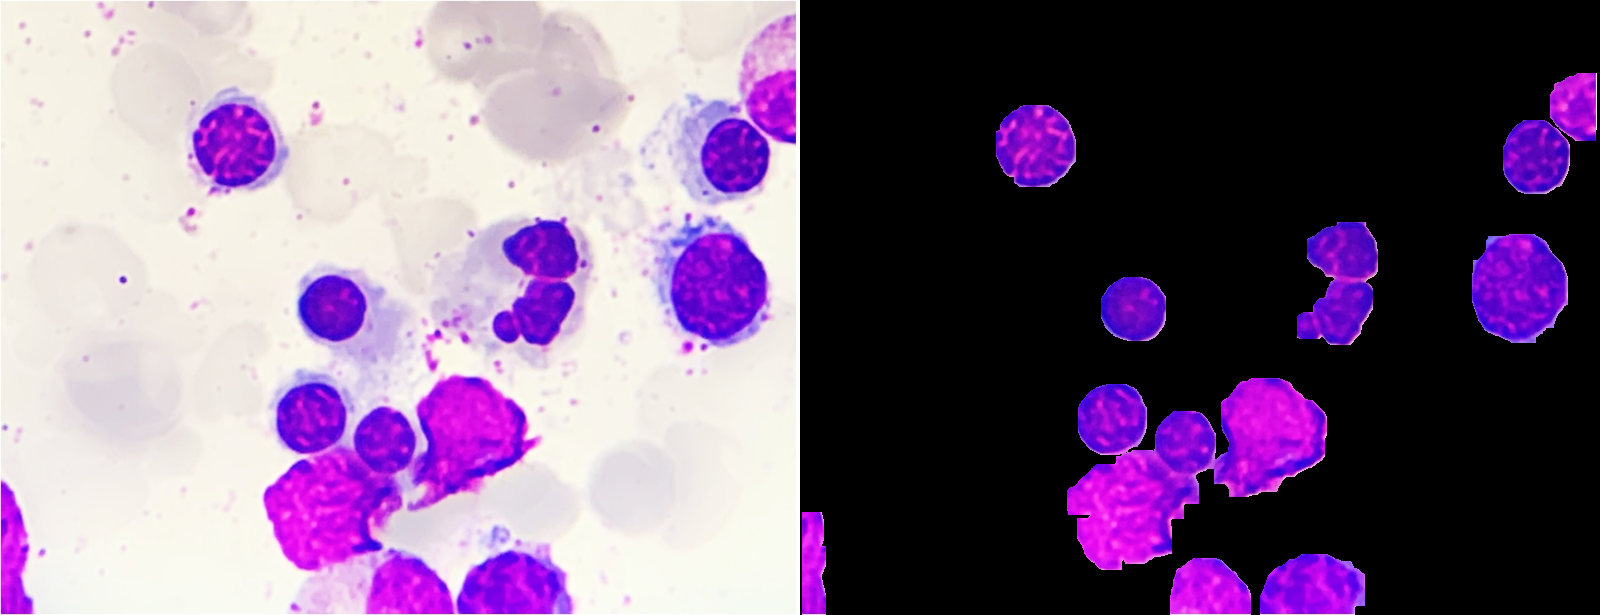

In [ ]:
cv2_imshow(np.hstack((img,final_img)))

In [ ]:
image = cv2.cvtColor(final_img, cv2.COLOR_RGB2LAB)


In [ ]:
l,a,b = cv2.split(image)

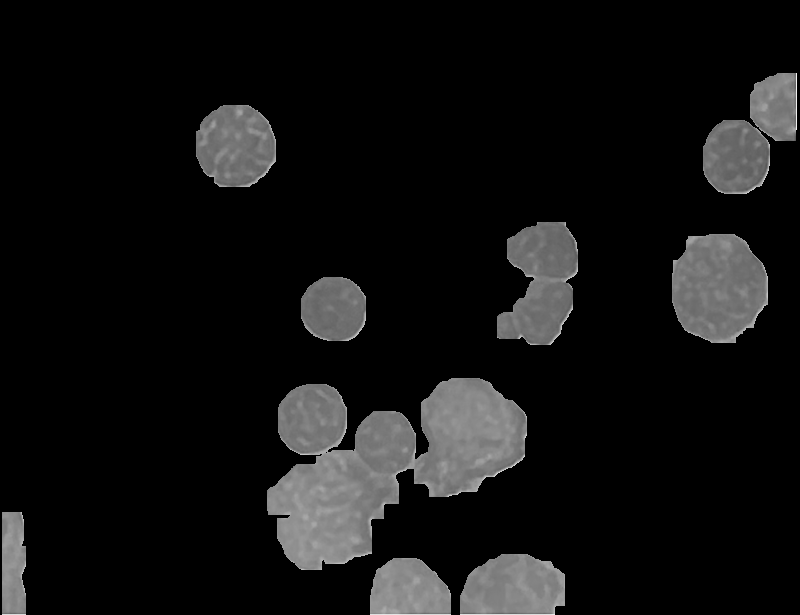

In [ ]:
cv2_imshow(l)

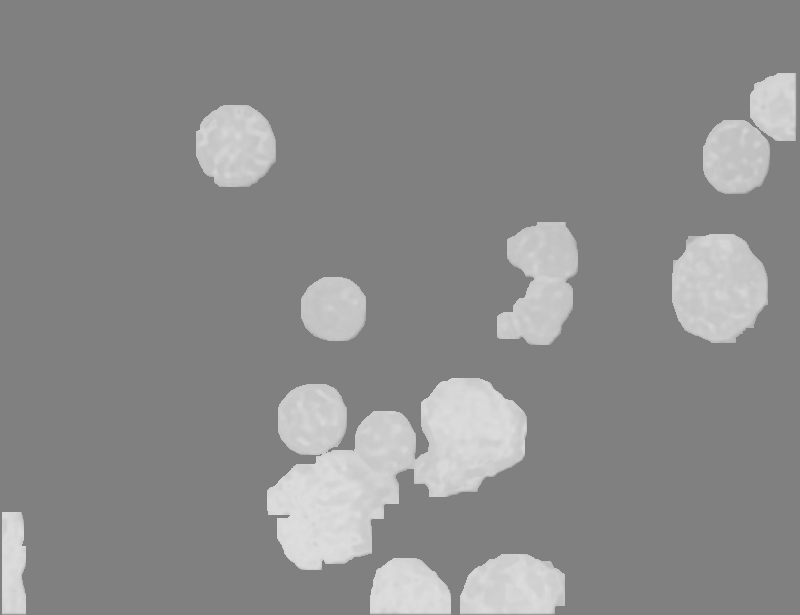

In [ ]:
cv2_imshow(a)

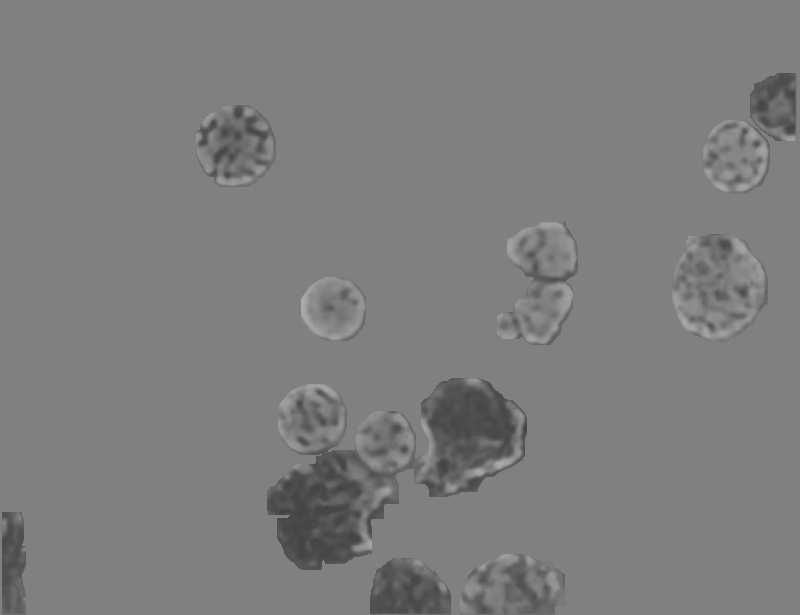

In [ ]:
cv2_imshow(b)

In [ ]:
import numpy as np
a_space = l
b_space = b
a_space = np.float32(a_space)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,10,1.0) 
k = 3
attempts = 10
ret,label,center = cv2.kmeans(a_space,k,None,criteria,attempts,cv2.KMEANS_RANDOM_CENTERS)

In [ ]:
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((a.shape))

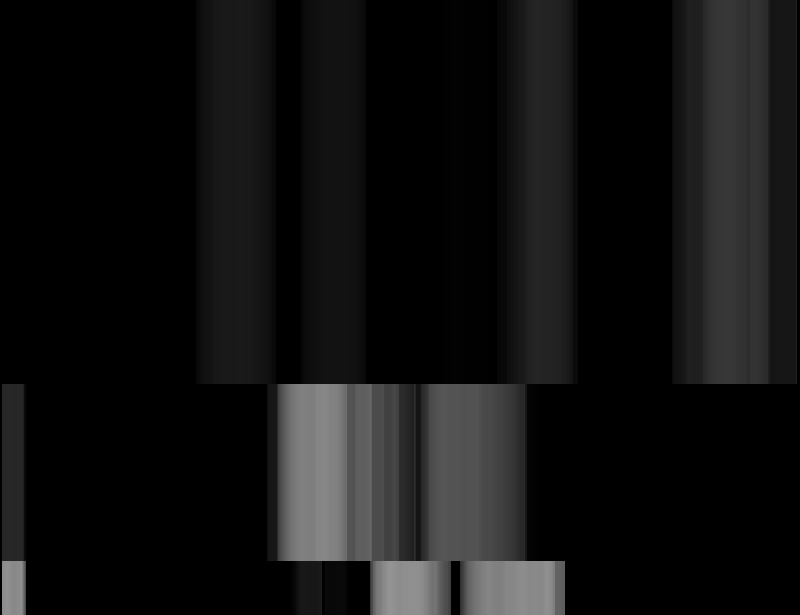

In [ ]:
cv2_imshow(res2)